**Partie 1 : Importer le fichier et charger les données**

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



# 2. Charger les données dans un DataFrame
df = pd.read_csv("student_lifestyle_dataset.csv")

# 3. Afficher les 5 premières lignes du DataFrame pour vérifier les données
print("Aperçu des données :")
print(df.head())



Aperçu des données :
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67 

**Partie 2 : Vérification et nettoyage des données**

In [ ]:
# Vérification des informations sur le DataFrame
print("\nInformations sur les données :")
print(df.info())

# Supprimer les doublons
df = df.drop_duplicates()



# Résumé statistique des données
print("\nRésumé statistique des données :")
print(df.describe())



Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None

Résumé statistique des données :
        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.0

In [ ]:
# Vérifier les types de colonnes dans le DataFrame
print("Types de données des colonnes :")
print(df.dtypes)

# Identifier les colonnes numériques et non numériques
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

print("\nColonnes numériques :", numeric_columns)
print("\nColonnes non numériques :", non_numeric_columns)


Types de données des colonnes :
Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object

Colonnes numériques : Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA'],
      dtype='object')

Colonnes non numériques : Index(['Stress_Level'], dtype='object')


In [ ]:
# Remplacer les valeurs manquantes dans les colonnes numériques par la moyenne
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [ ]:
# Remplacer les valeurs manquantes dans les colonnes non numériques par le mode (valeur la plus fréquente)
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


**Partie 3 : Visualisation des données**

Colonnes utilisées pour la heatmap :
Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA'],
      dtype='object')


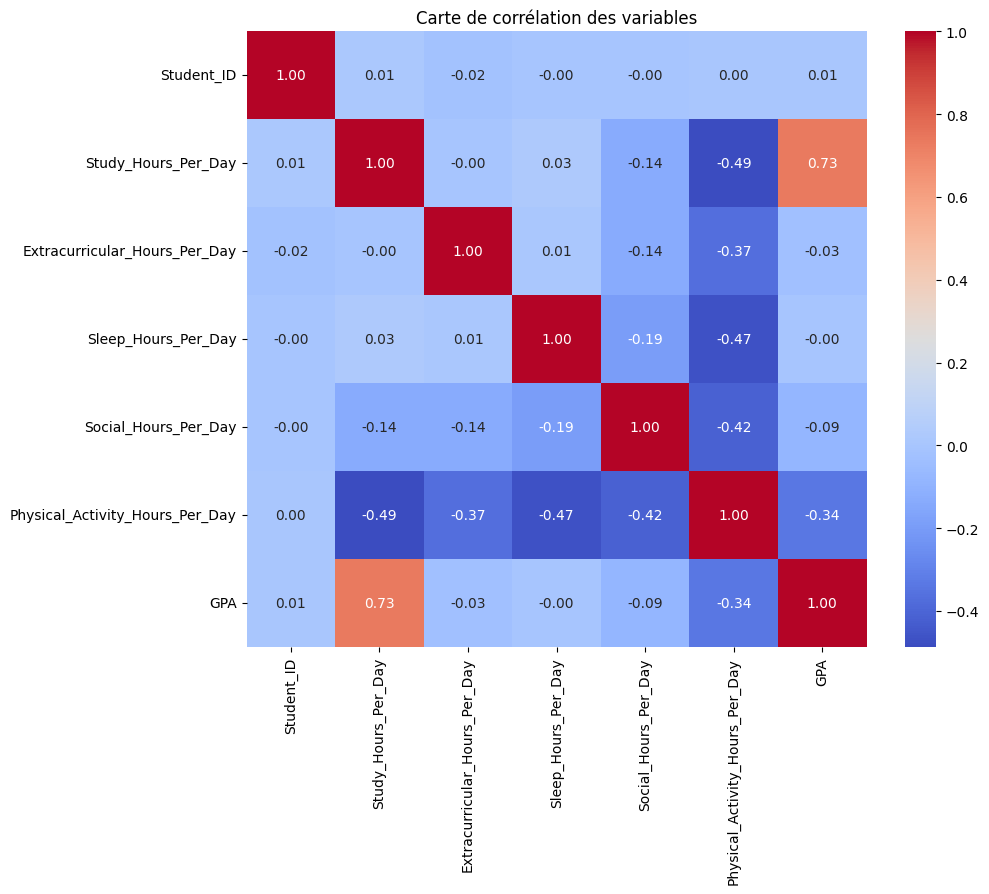

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['number'])

# Vérifier les colonnes sélectionnées
print("Colonnes utilisées pour la heatmap :")
print(numeric_df.columns)

# Heatmap des corrélations entre les colonnes numériques
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Carte de corrélation des variables")
plt.show()


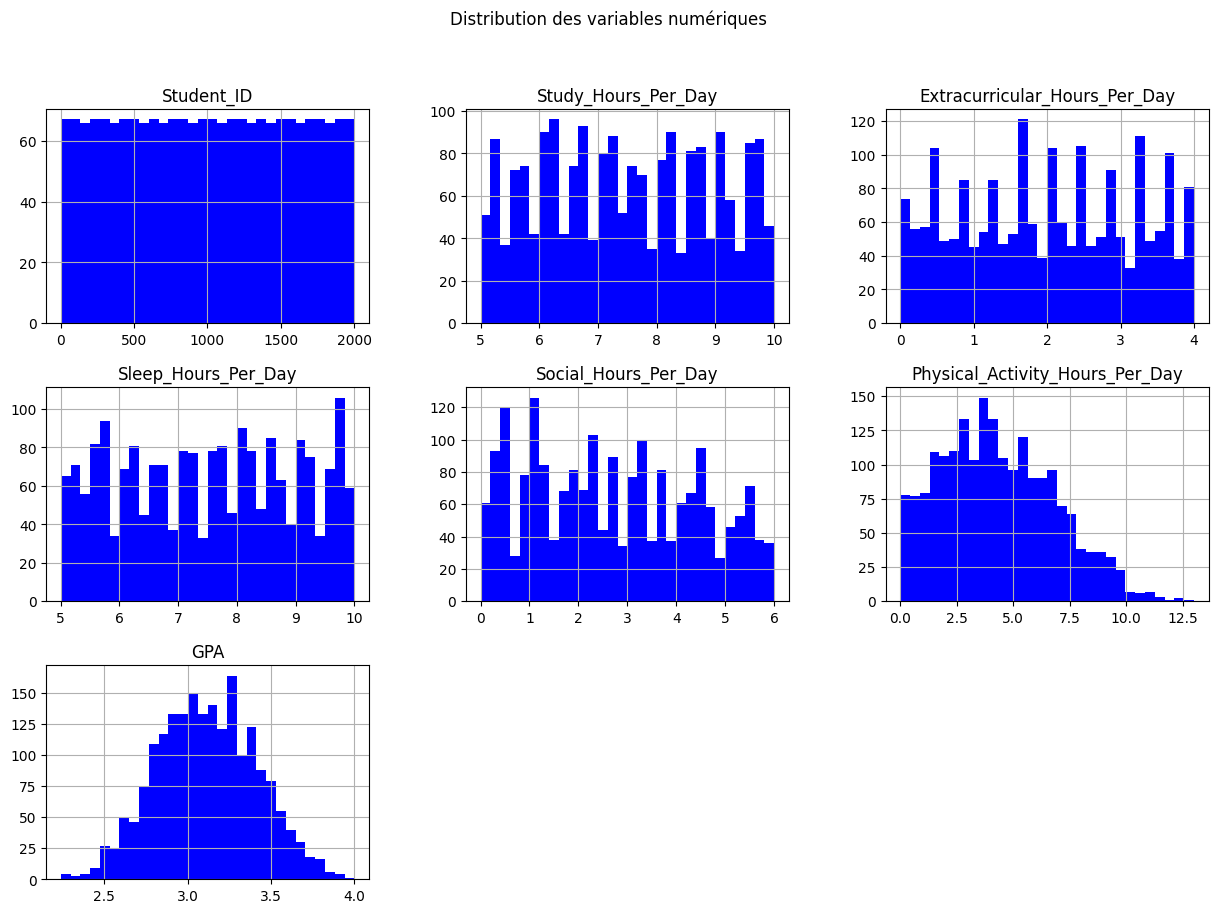

In [ ]:
# Histogrammes des colonnes numériques uniquement
numeric_df.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribution des variables numériques')
plt.show()



**Partie 4 : Prétraitement des données pour le clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisation des colonnes numériques
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[float, int]))

# Afficher un aperçu des données normalisées
print("\nDonnées normalisées (premières lignes) :")
print(data_scaled[:5])



Données normalisées (premières lignes) :
[[-1.731185   -0.40448677  1.56624592  0.82073377  0.05654313 -1.00589562
  -0.42183684  1.30033618]
 [-1.72945295 -1.52845139  1.30663281  0.34147317  0.88588186 -0.52847018
  -1.22559075  0.19601671]
 [-1.7277209  -1.66894696  1.65278363  1.16306277 -0.89127256  0.10809708
  -1.49350872  0.19601671]
 [-1.72598885 -0.68547792  0.09510494 -0.20625322 -0.59508016  0.86402069
  -0.79022405  1.30033618]
 [-1.72425679  0.4384867  -1.20296064 -0.68551382 -0.29888775  0.90380615
   1.31962996 -0.90830276]]


**Partie 5 : Clustering avec K-Means**


Centres des clusters :
[[-0.07971711 -0.78781421 -0.25086782 -0.91795943 -0.19004009  1.22258095
  -0.58625358 -0.19026788 -1.46011456]
 [-0.02632514  1.05148337  0.04410749  0.05305988 -0.100937   -0.57883742
   0.81409635 -0.90542318 -0.16854927]
 [ 0.07889411 -0.56708172  0.1179268   0.54274613  0.22728001 -0.20107904
  -0.45447478  1.05345351  1.12301602]]

Répartition des clusters :
Cluster
1    767
2    747
0    486
Name: count, dtype: int64


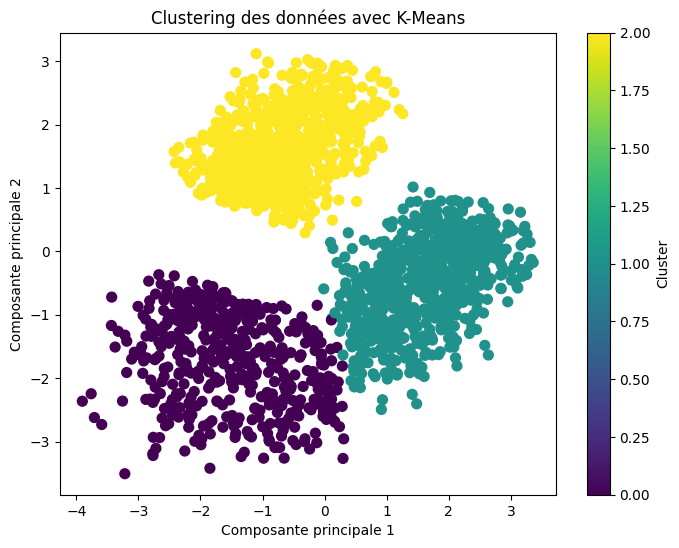

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supposons que `data_scaled` soit vos données déjà mises à l'échelle
# Exemple de mise à l'échelle (si vous ne l'avez pas encore fait)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Appliquer K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Afficher les centres des clusters
print("\nCentres des clusters :")
print(kmeans.cluster_centers_)

# Afficher la répartition des clusters
print("\nRépartition des clusters :")
print(df['Cluster'].value_counts())

# Réduire les dimensions à 2 pour la visualisation (PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Tracer les points avec une couleur différente pour chaque cluster
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering des données avec K-Means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()



**Partie 7 : Sauvegarde des données nettoyées et enrichies**

In [ ]:
# Sauvegarder les données nettoyées et enrichies dans un fichier CSV
df.to_csv("student_lifestyle_cleaned.csv", index=False)
print("\nLes données nettoyées et enrichies ont été sauvegardées dans 'student_lifestyle_cleaned.csv'.")



Les données nettoyées et enrichies ont été sauvegardées dans 'student_lifestyle_cleaned.csv'.
